In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter, FuncFormatter
from scipy.stats import fisher_exact
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
sns.set(style="white")

# --- Global variables ---
RANDOM_STATE = 42
SIGNIFICANCE_LEVEL = 0.05


In [2]:
file_path = '../data/raw/KAG_conversion_data.csv'
df = pd.read_csv(file_path)

sales = pd.read_csv(file_path)

features = ['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent']
target = 'Total_Conversion_Group'

sales_encoded = pd.get_dummies(sales[features])  # One-hot encode categorical features.
sales[target] = pd.qcut(sales['Total_Conversion'], q=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(sales_encoded, sales[target], 
                                                    test_size=0.3, random_state=RANDOM_STATE)
print(f"X_train: {X_train.shape[0]:,} (rows)")
print(f"X_test : {X_test.shape[0]:,} (rows)")

X_train: 800 (rows)
X_test : 343 (rows)


In [3]:
sales[target].value_counts()

Total_Conversion_Group
0    674
2    307
1    162
Name: count, dtype: int64

In [4]:
quantiles = pd.qcut(sales['Total_Conversion'], q=3, retbins=True, labels=False)
bucket_ranges = quantiles[1]

bucket_labels = [
    f'Low Conversion\n[{bucket_ranges[0]:.0f} - {bucket_ranges[1]:.0f}]',
    f'Medium Conversion\n[{bucket_ranges[1]:.0f} - {bucket_ranges[2]:.0f}]',
    f'High Conversion\n[{bucket_ranges[2]:.0f} - {bucket_ranges[3]:.0f}]'
]
bucket_labels

['Low Conversion\n[0 - 1]',
 'Medium Conversion\n[1 - 2]',
 'High Conversion\n[2 - 60]']

In [5]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7288629737609329
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       207
           1       0.15      0.07      0.10        43
           2       0.71      0.70      0.71        93

    accuracy                           0.73       343
   macro avg       0.55      0.55      0.54       343
weighted avg       0.69      0.73      0.70       343



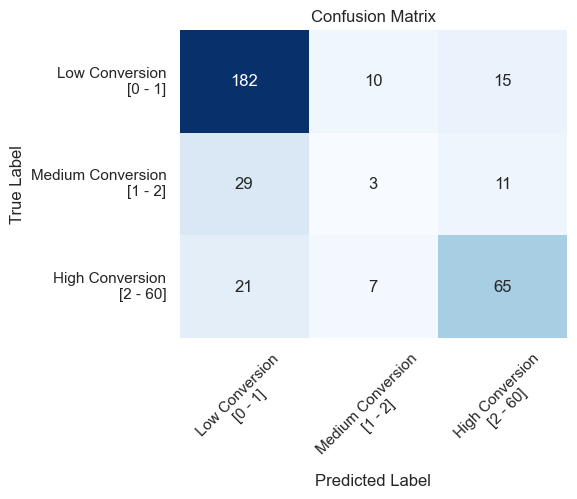

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=bucket_labels, 
            yticklabels=bucket_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.show()

In [ ]:
y_probas = model.predict_proba(X_test)
y_probas

class_0_probs = y_probas[:, 0]
class_1_probs = y_probas[:, 1]
class_2_probs = y_probas[:, 2]

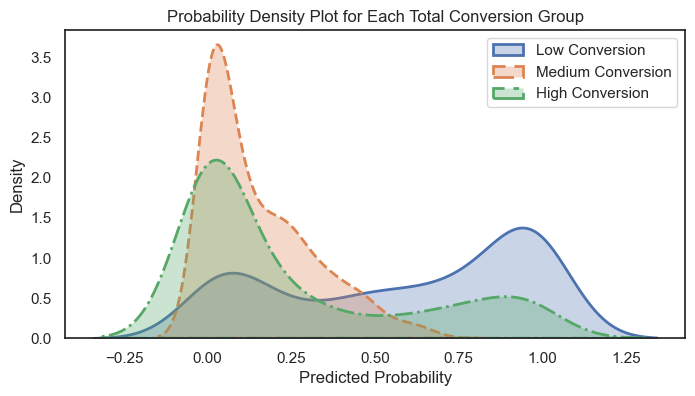

In [9]:
plt.figure(figsize=(8, 4))

sns.kdeplot(class_0_probs, fill=True, alpha=0.3, lw=2, linestyle='-', label='Low Conversion')
sns.kdeplot(class_1_probs, fill=True, alpha=0.3, lw=2, linestyle='--', label='Medium Conversion')
sns.kdeplot(class_2_probs, fill=True, alpha=0.3, lw=2, linestyle='-.', label='High Conversion')

plt.title('Probability Density Plot for Each Total Conversion Group')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

X_train: 800 (rows)
X_test : 343 (rows)
Accuracy: 0.7288629737609329
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       207
           1       0.15      0.07      0.10        43
           2       0.71      0.70      0.71        93

    accuracy                           0.73       343
   macro avg       0.55      0.55      0.54       343
weighted avg       0.69      0.73      0.70       343



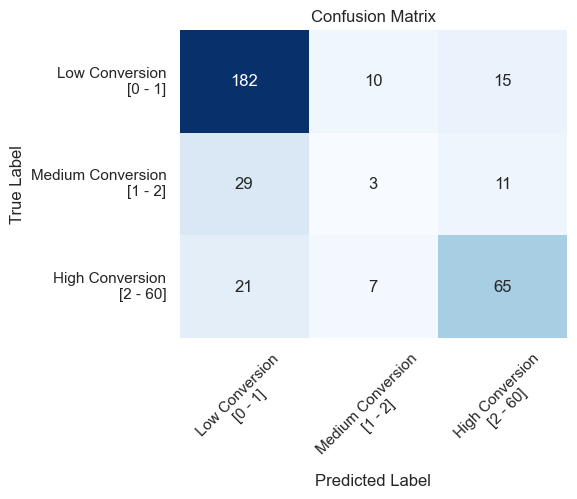

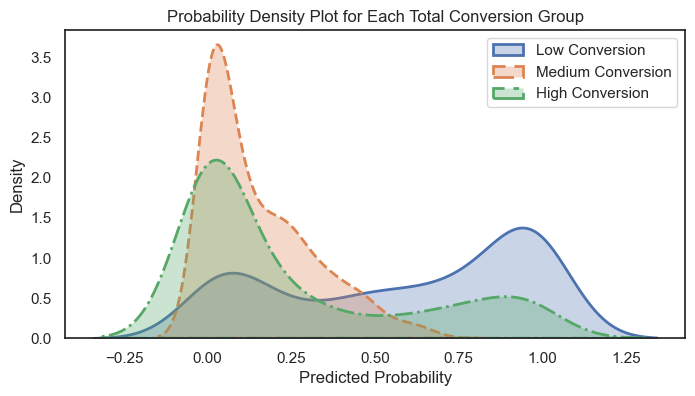

In [ ]:
file_path = '../data/raw/KAG_conversion_data.csv'
sales = pd.read_csv(file_path)

features = ['age', 'gender', 'interest', 'Impressions', 'Clicks', 'Spent']
target = 'Total_Conversion_Group'

sales_encoded = pd.get_dummies(sales[features])  # One-hot encode categorical features.
sales[target] = pd.qcut(sales['Total_Conversion'], q=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(sales_encoded, sales[target], 
                                                    test_size=0.3, random_state=RANDOM_STATE)
print(f"X_train: {X_train.shape[0]:,} (rows)")
print(f"X_test : {X_test.shape[0]:,} (rows)")

quantiles = pd.qcut(sales['Total_Conversion'], q=3, retbins=True, labels=False)
bucket_ranges = quantiles[1]

bucket_labels = [
    f'Low Conversion\n[{bucket_ranges[0]:.0f} - {bucket_ranges[1]:.0f}]',
    f'Medium Conversion\n[{bucket_ranges[1]:.0f} - {bucket_ranges[2]:.0f}]',
    f'High Conversion\n[{bucket_ranges[2]:.0f} - {bucket_ranges[3]:.0f}]'
]
bucket_labels


model = RandomForestClassifier(random_state=RANDOM_STATE)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=bucket_labels, 
            yticklabels=bucket_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.show()

y_probas = model.predict_proba(X_test)
y_probas

class_0_probs = y_probas[:, 0]
class_1_probs = y_probas[:, 1]
class_2_probs = y_probas[:, 2]


plt.figure(figsize=(8, 4))

sns.kdeplot(class_0_probs, fill=True, alpha=0.3, lw=2, linestyle='-', label='Low Conversion')
sns.kdeplot(class_1_probs, fill=True, alpha=0.3, lw=2, linestyle='--', label='Medium Conversion')
sns.kdeplot(class_2_probs, fill=True, alpha=0.3, lw=2, linestyle='-.', label='High Conversion')

plt.title('Probability Density Plot for Each Total Conversion Group')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

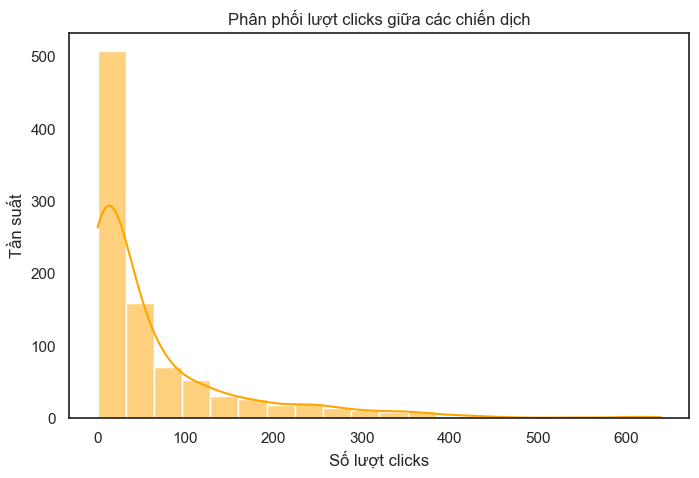

In [36]:

plt.figure(figsize=(8, 5))
sns.histplot(df[df['Spent'] != 0]['Spent'], kde=True, bins=20, color='orange')
plt.title('Phân phối lượt clicks giữa các chiến dịch')
plt.xlabel('Số lượt clicks')
plt.ylabel('Tần suất')
plt.show()


<Axes: ylabel='Spent'>

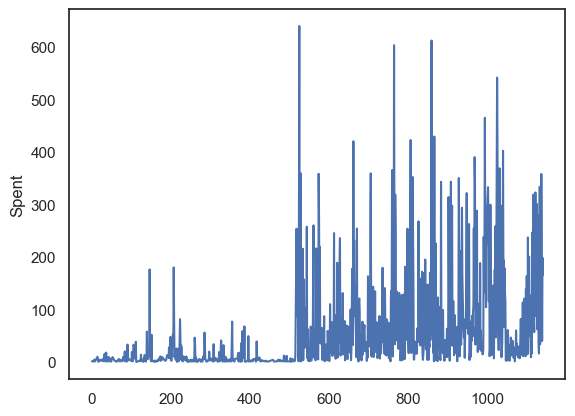

In [46]:
df['Spent'][df['Spent'] != 0].value_counts

sns.lineplot(df['Spent'][df['Spent'] != 0].sort_values(ascending=True))

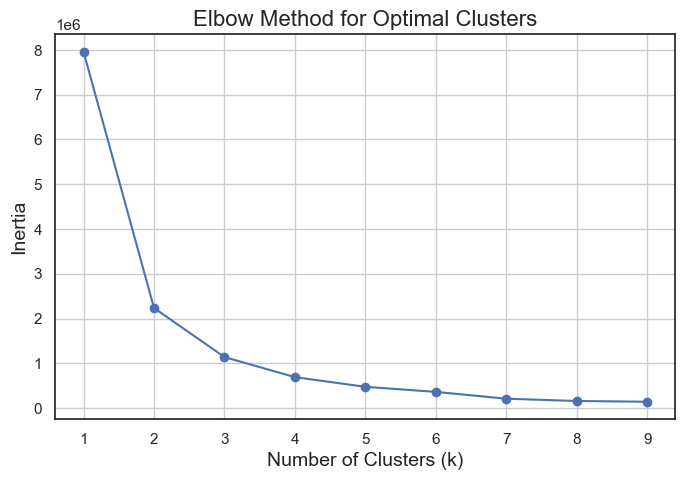

ValueError: Length of values (936) does not match length of index (1143)

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lọc các giá trị Spent khác 0
spent_values = df['Spent'][df['Spent'] != 0].values.reshape(-1, 1)

# Sử dụng Elbow Method để tìm số lượng cụm tối ưu
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spent_values)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.show()

# Áp dụng K-Means với số cụm tối ưu (ví dụ: 3 cụm)
optimal_k = 3  # Chọn số cụm từ Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Spent_Group'] = kmeans.fit_predict(spent_values)

# Xem các nhóm được phân
print(df[['Spent', 'Spent_Group']].head())


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Chia dữ liệu
X = df[["Spent"]]  # Chọn các feature quan trọng từ heatmap
y = df["Total_Conversion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá model
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


MSE: 8.217927833672604
R-squared: 0.56450139603502
